**Model the probability of borrowers to pay back loans**

This project focuses on building a decision tree and a random forest model to predict the probability of borrowers to pay back the loans. Data was obtained from Lending club

**Step 1: Read the data**

In [2]:
#Import all the libraries that will be required during the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
loan_data = pd.read_csv('loan_data.csv')

In [5]:
# Checking the general statistics of the columns

loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


It can be observed that the data is clean and does not have any missing values. We can move to next step...

**Step 2: Exploratory analysis and data visualization**

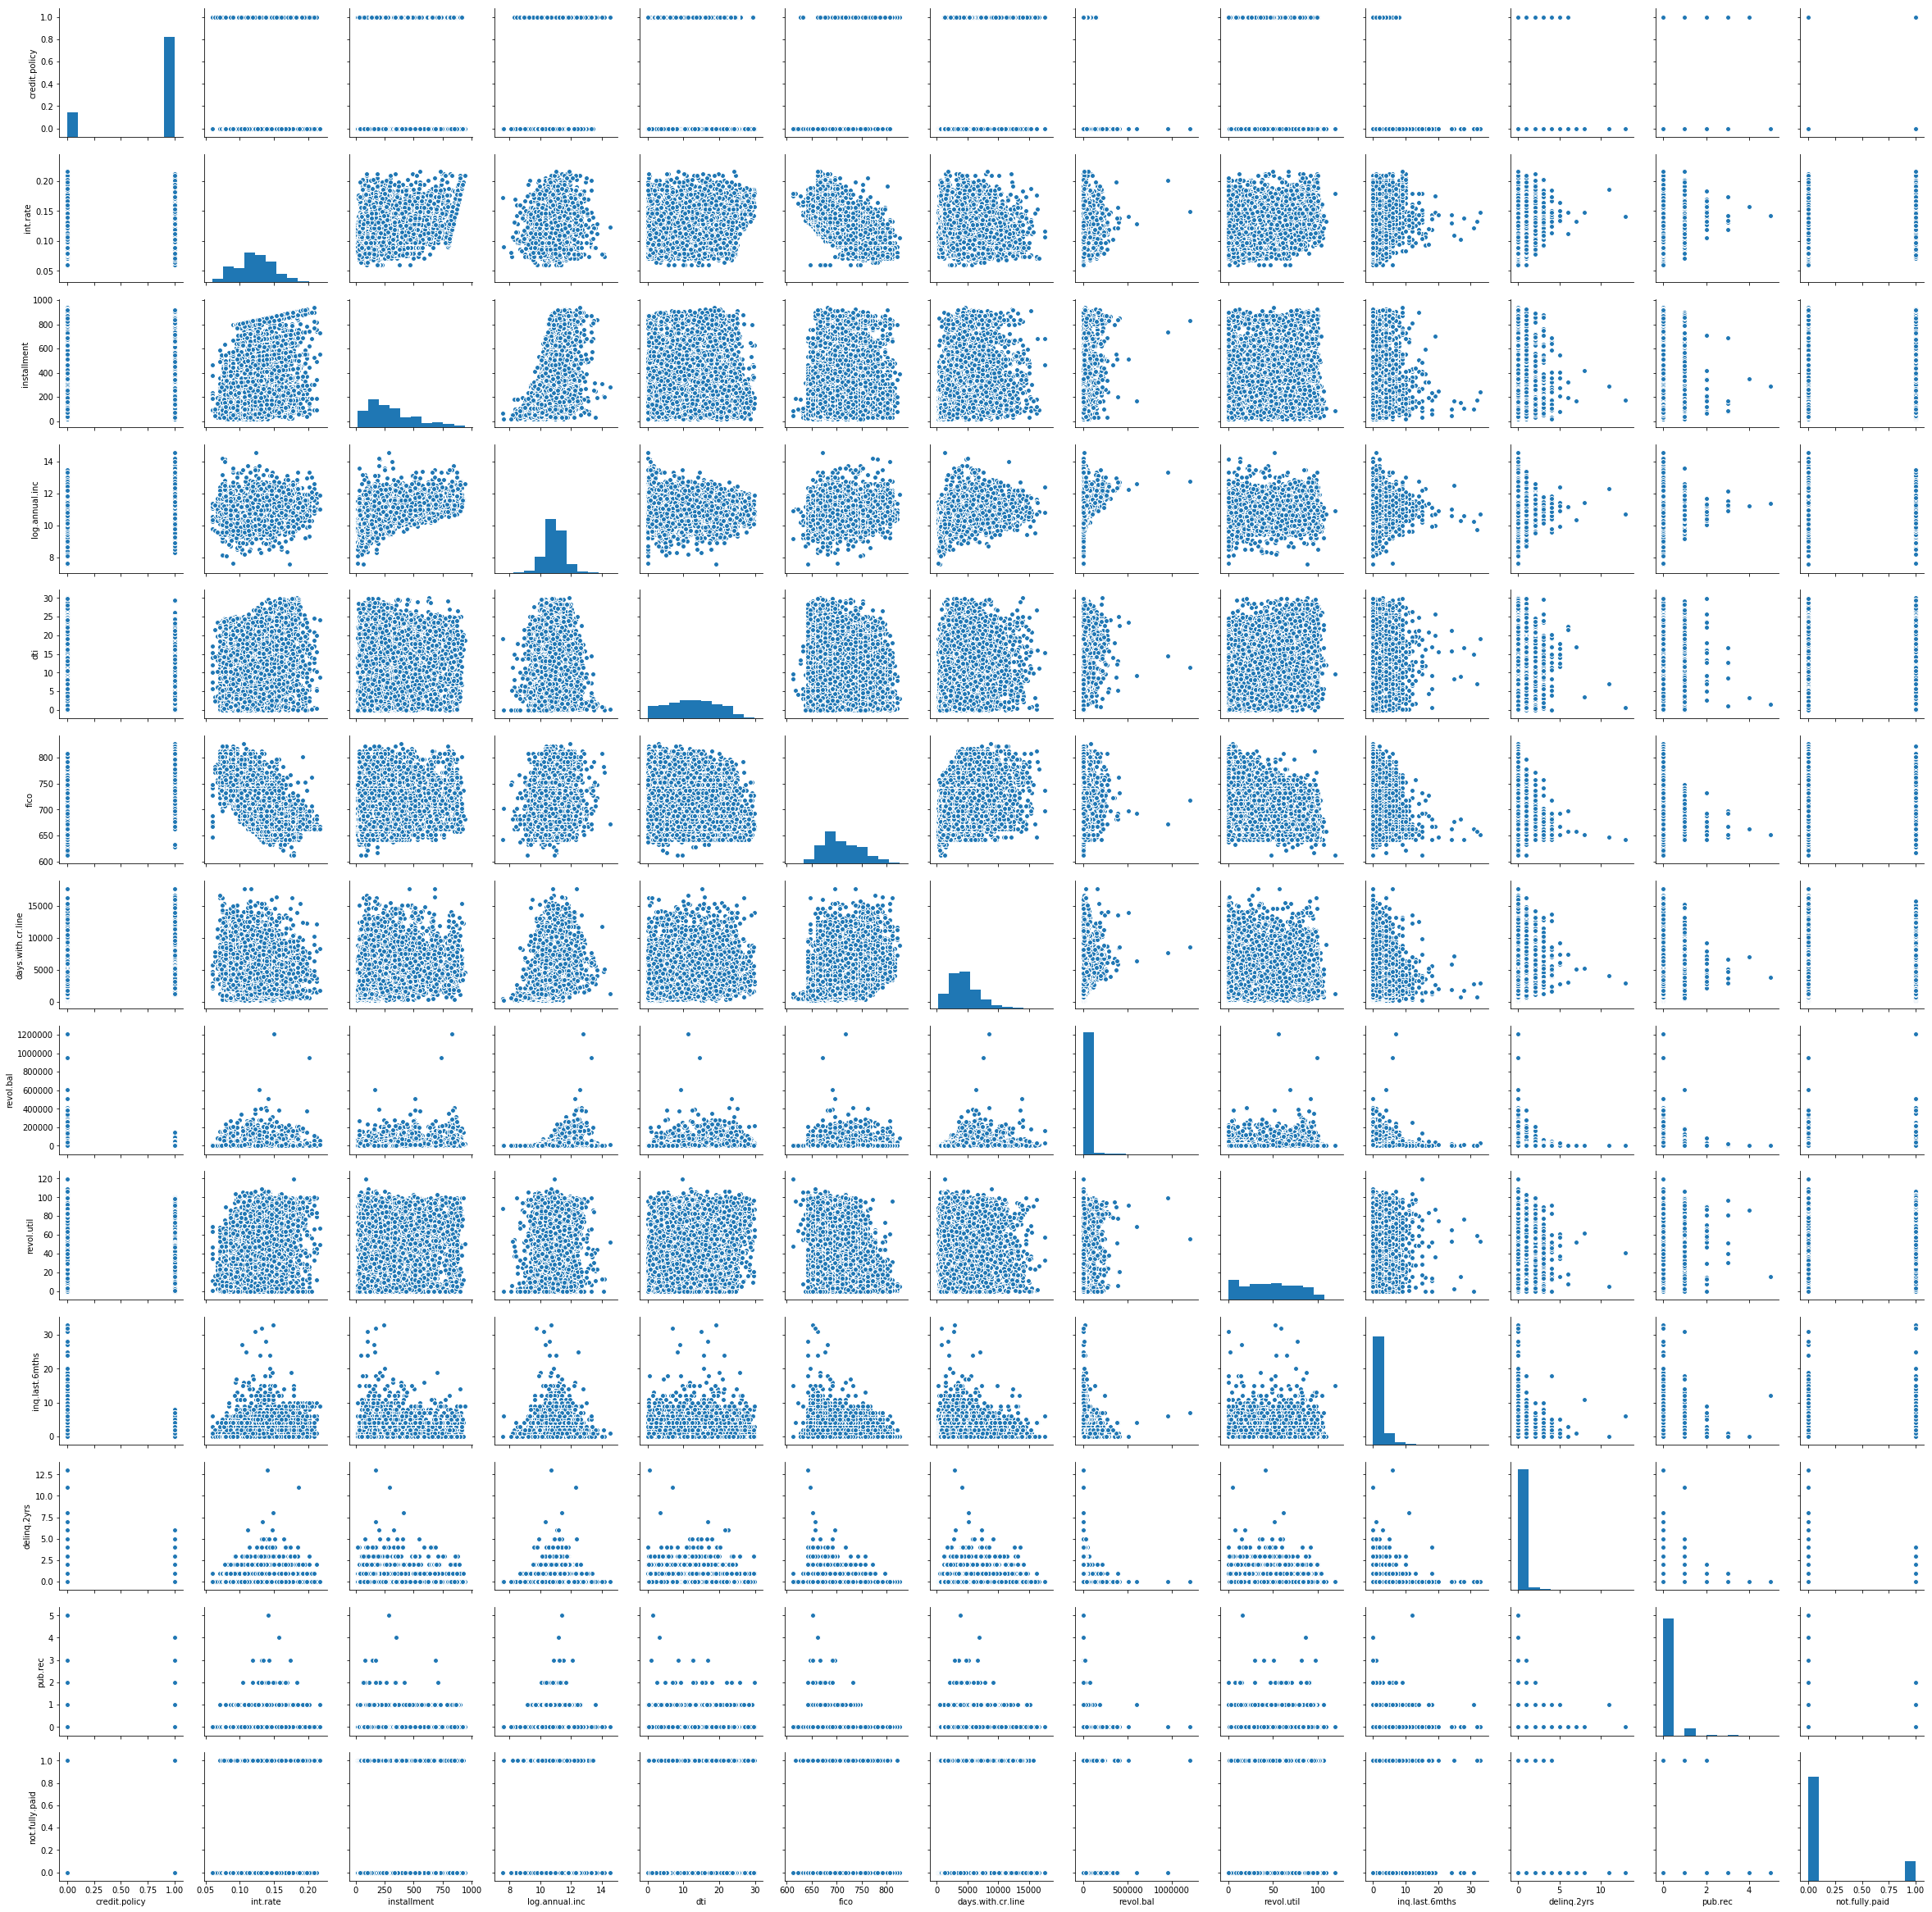

In [6]:
# We will plot pair plots

sns.pairplot(data=loan_data)

<font color=blue> Further exploring the relationship between not.fully.paid and credit score</font>

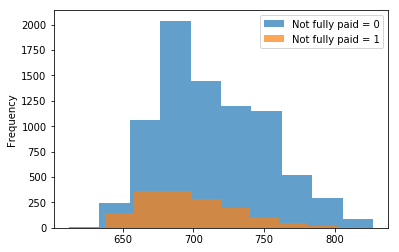

In [14]:
# Using a histogram 

loan_data['fico'][loan_data['not.fully.paid']==0].plot.hist(alpha = 0.7,label='Not fully paid = 0')
loan_data['fico'][loan_data['not.fully.paid']==1].plot.hist(alpha = 0.7,label='Not fully paid = 1')
plt.legend()

It can be observed from the above plot that the number of people who did not paid fully redcues as the credit score goes higher. This is expected as the people with higher credit score are considered reliable borrowers

In [18]:
# Converting categorial variables for purpose into dummy varaibles
purpose_cat = ['purpose']

In [20]:
loans = pd.get_dummies(loan_data,purpose_cat,drop_first=True)

**Step 3: Split the data into training and testing dataset**

In [15]:
# Import train_test_split and split the data

from sklearn.model_selection import train_test_split

In [21]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Step 4: Decision tree model**

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
loan_tree = DecisionTreeClassifier()

In [25]:
# Fit the training data to develop a Desicion Tree Model

loan_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
# Use the decision tree for predicting

loan_predict = loan_tree.predict(X_test)

In [28]:
#score the data

from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,loan_predict))

             precision    recall  f1-score   support

          0       0.85      0.84      0.85      2650
          1       0.21      0.22      0.22       511

avg / total       0.75      0.74      0.74      3161



**Step 5: Random Forest Model**

In [42]:
#develop a random forest model

from sklearn.ensemble import RandomForestClassifier

In [45]:
loan_forest = RandomForestClassifier()
loan_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
loan_predict2 = loan_forest.predict(X_test)

In [49]:
#score the data

from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(y_test,loan_predict2))
print(confusion_matrix(y_test,loan_predict2))

             precision    recall  f1-score   support

          0       0.84      0.98      0.91      2650
          1       0.35      0.05      0.09       511

avg / total       0.76      0.83      0.77      3161

[[2602   48]
 [ 485   26]]


**Conclusion**

While both the decision tree and random forest had good precision and recall in predicting loans paid fully. The loans not fully paid were recalled better by decision tree